## Data Augmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# This function will plot images in the form of a grid with 1 row and 10 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, 
                        zoom_range= 0.1, channel_shift_range=10,
                        horizontal_flip=True)

In [4]:
chosen_image = random.choice(os.listdir('D:/Research/SIPFAA/Dataset/basedata/training/healthy'))

In [5]:
image_path = 'D:/Research/SIPFAA/Dataset/basedata/training/healthy/' + chosen_image
print(image_path)

D:/Research/SIPFAA/Dataset/basedata/training/healthy/aug_0_6760.jpg


In [6]:
# validating the image path
assert os.path.isfile(image_path) 

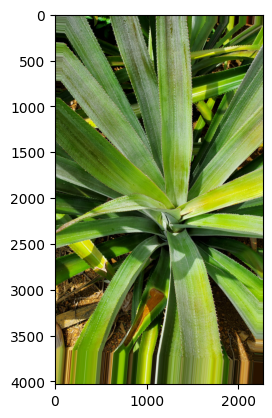

In [7]:
# Display the randomly chosen image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [8]:
# Generate batches of augmented images from this image
aug = gen.flow(image)

In [18]:
# Get 20 samples of augmented images
aug_images = [next(aug)[0].astype(np.uint8) for i in range(5)]
# print(aug_images)

In [17]:
# Augmented Images
# plotImages(aug_images)

In [19]:
# Saving the image
aug_iter = gen.flow(aug_images, save_to_dir='D:/Research/SIPFAA/Dataset/', save_prefix='aug-', save_format='jpg')


ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (4032, 2268, 3))

In [8]:
# augmenting method 2
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
            rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, 
                        zoom_range= 0.1, channel_shift_range=10,
                        horizontal_flip=True)
x = io.imread('E:/Research/Dataset/basedata/training/mealy_bug/received_747839939912408.jpg')
x = x.reshape((1, ) + x.shape)
i = 1
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir='E:/Research/Dataset/aug',
                          save_prefix='aug',
                          save_format='jpg'):    
  i += 1    
  if i > 20:        
     break